In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()


Saving insurance_dataset.csv to insurance_dataset.csv


In [3]:
df=pd.read_csv('insurance_dataset.csv')

In [4]:
df.shape

(1338, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1329 non-null   float64
 1   sex                              1338 non-null   object 
 2   bmi                              1335 non-null   float64
 3   children                         1333 non-null   float64
 4   smoker                           1338 non-null   object 
 5   Claim_Amount                     1324 non-null   float64
 6   past_consultations               1332 non-null   float64
 7   num_of_steps                     1335 non-null   float64
 8   Hospital_expenditure             1334 non-null   float64
 9   NUmber_of_past_hospitalizations  1336 non-null   float64
 10  Anual_Salary                     1332 non-null   float64
 11  region                           1338 non-null   object 
 12  charges             

In [6]:
df.isna().sum()

age                                 9
sex                                 0
bmi                                 3
children                            5
smoker                              0
Claim_Amount                       14
past_consultations                  6
num_of_steps                        3
Hospital_expenditure                4
NUmber_of_past_hospitalizations     2
Anual_Salary                        6
region                              0
charges                             0
dtype: int64

In [7]:
df.isna().sum().sum()

52

In [8]:
len(df)*0.10

133.8

In [9]:
df.head(2)

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.21,0.0,no,29087.54313,17.0,715428.0,4720920.992,0.0,55784970.05,southeast,1121.8739
1,18.0,male,30.14,0.0,no,39053.67437,7.0,699157.0,4329831.676,0.0,13700885.19,southeast,1131.5066


for ifc in df.select_dtypes(include='float64').columns:
    df[ifc].plot(kind='density', subplots=True, layout=(3, 5), figsize=(15, 10), sharex=False)
    plt.show()

In [10]:
df.head(2)

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.21,0.0,no,29087.54313,17.0,715428.0,4720920.992,0.0,55784970.05,southeast,1121.8739
1,18.0,male,30.14,0.0,no,39053.67437,7.0,699157.0,4329831.676,0.0,13700885.19,southeast,1131.5066


In [11]:
for ifc in df.select_dtypes(include='float64').columns:
    if(df[ifc].skew()> 0.5):
        print (ifc, 'skewed')
        df[ifc]=df[ifc].fillna(df[ifc].median())
    else:
        print(ifc,'Normal')
        df[ifc]=df[ifc].fillna(df[ifc].mean())

age Normal
bmi Normal
children skewed
Claim_Amount Normal
past_consultations Normal
num_of_steps Normal
Hospital_expenditure skewed
NUmber_of_past_hospitalizations Normal
Anual_Salary skewed
charges skewed


for oc in df.select_dtypes(include='object').columns:
    df[oc]=df[oc].fillna(df[oc].mode()[0],inplace=True)
    

In [12]:
df.head(5)

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
0,18.0,male,23.21,0.0,no,29087.54313,17.0,715428.0,4720920.992,0.0,55784970.05,southeast,1121.8739
1,18.0,male,30.14,0.0,no,39053.67437,7.0,699157.0,4329831.676,0.0,13700885.19,southeast,1131.5066
2,18.0,male,33.33,0.0,no,39023.62759,19.0,702341.0,6884860.774,0.0,73523107.27,southeast,1135.9407
3,18.0,male,33.66,0.0,no,28185.39332,11.0,700250.0,4274773.550,0.0,75819679.60,southeast,1136.3994
4,18.0,male,34.10,0.0,no,14697.85941,16.0,711584.0,3787293.921,0.0,23012320.01,southeast,1137.0110


In [13]:
df.isna().sum().sum()

0

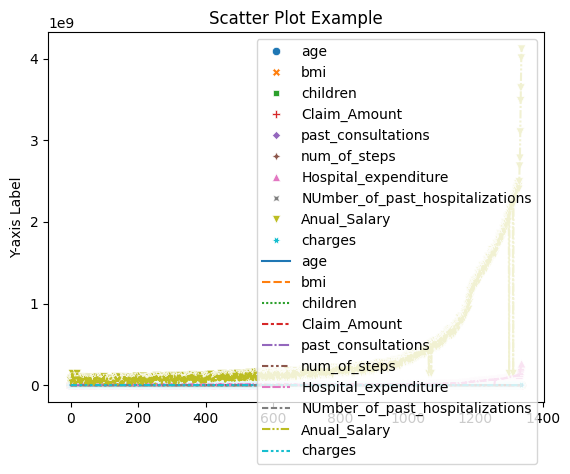

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming data is a pandas DataFrame containing x and y columns
# sns.scatterplot automatically extracts x and y from the DataFrame
sns.scatterplot(data=df)
sns.lineplot(data=df)
# Add labels and title
#plt.xticks(rotation=90)
plt.ylabel('Y-axis Label')
plt.title('Scatter Plot Example')

# Show plot
plt.show()

age


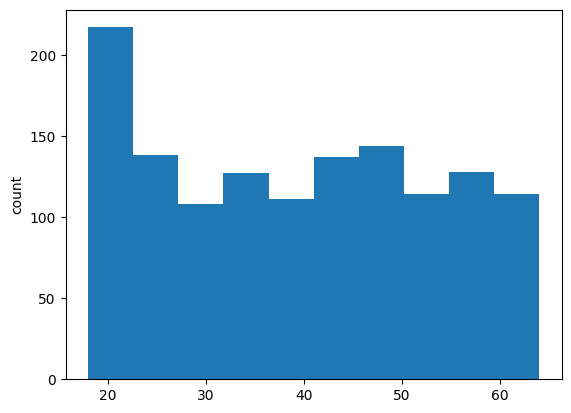

bmi


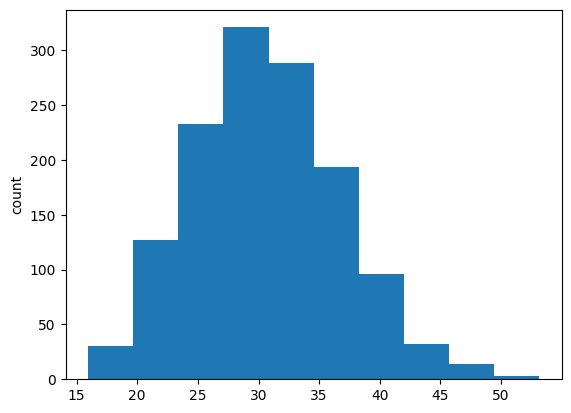

children


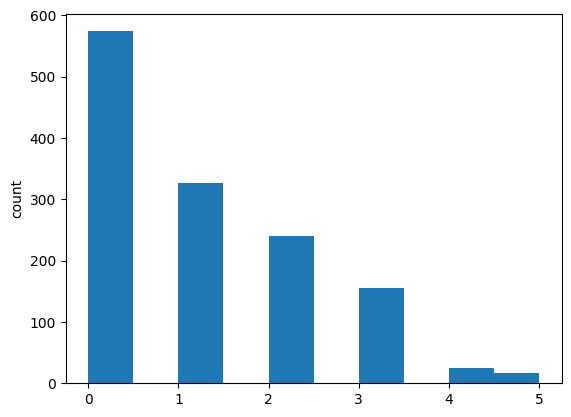

Claim_Amount


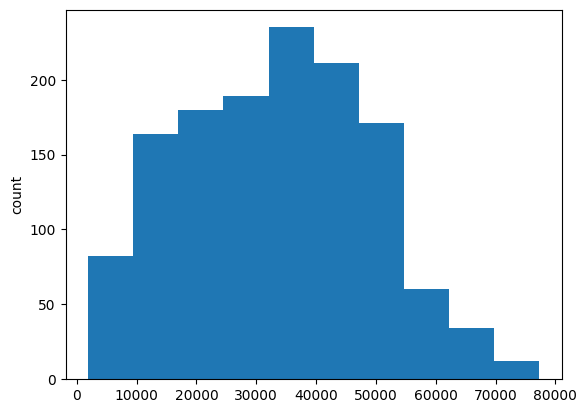

past_consultations


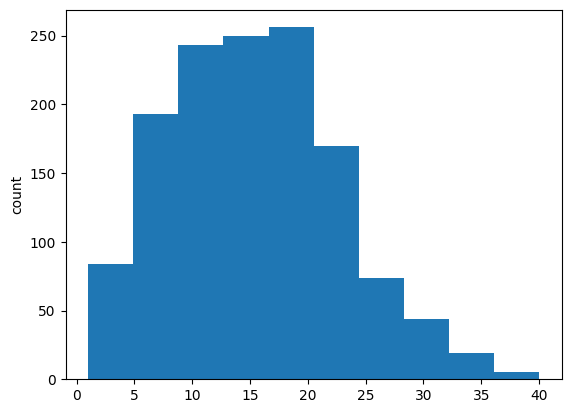

num_of_steps


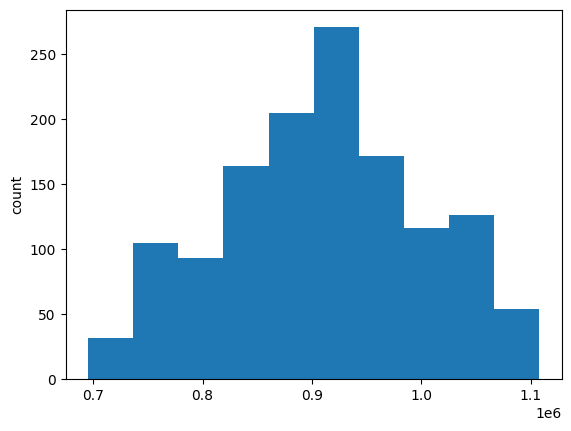

Hospital_expenditure


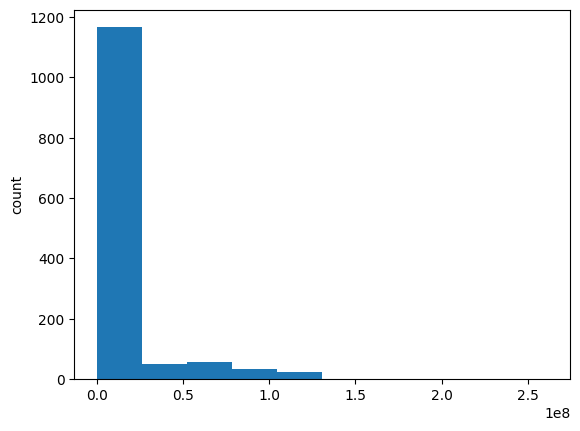

NUmber_of_past_hospitalizations


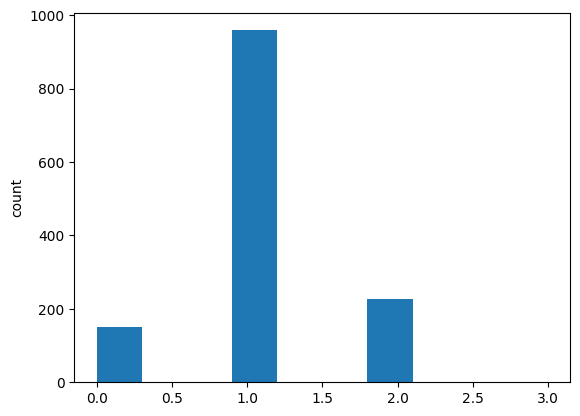

Anual_Salary


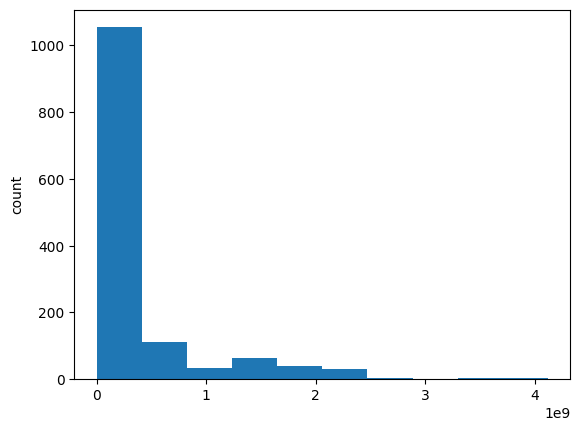

charges


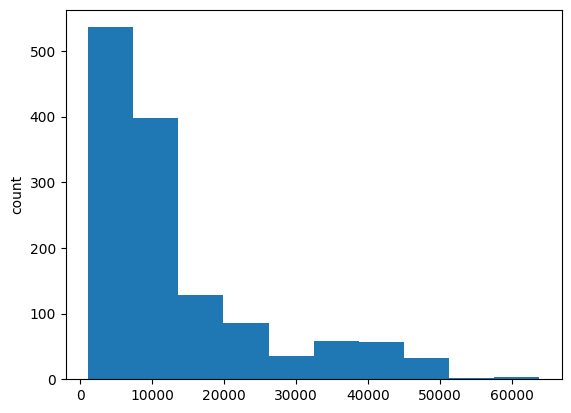

In [15]:
#visualization
for i in df.select_dtypes(include='float64').columns:
    plt.hist(df[i])
    print(i)
    plt.ylabel("count")
    plt.show()

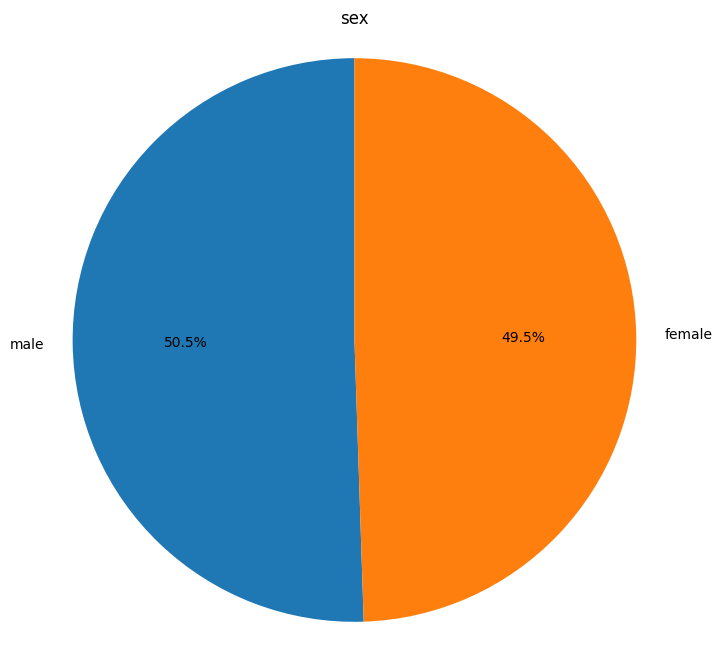

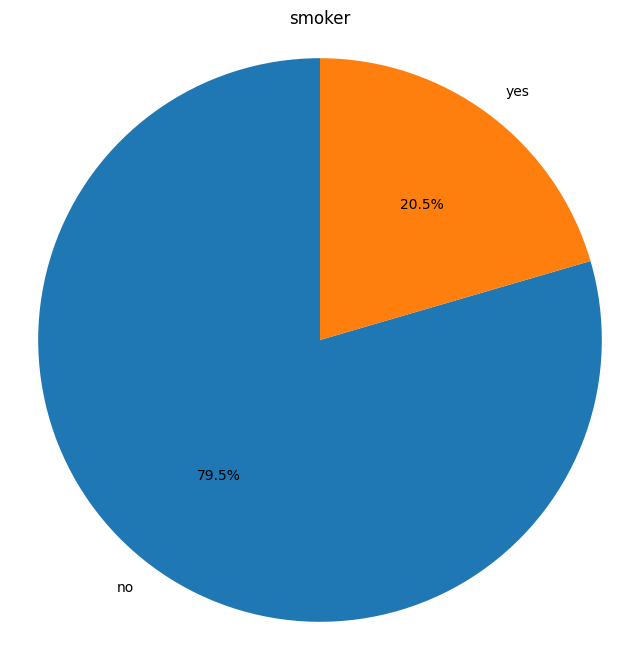

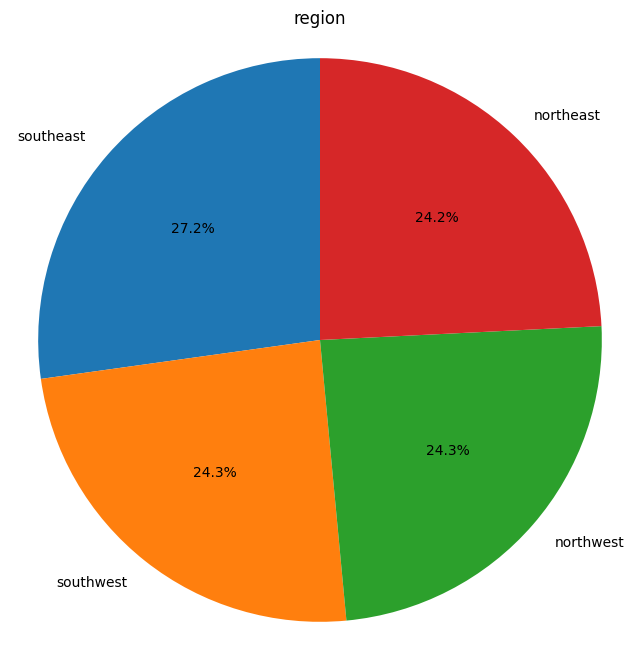

In [16]:

for i in df.select_dtypes(include='object_'):
    plt.figure(figsize=(8, 8))
    cnt=df[i].value_counts()
    plt.title(i)
    plt.pie(cnt, labels=cnt.index, autopct='%1.1f%%', startangle=90)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

In [17]:
y=df.iloc[:,-1]
y


0        1121.87390
1        1131.50660
2        1135.94070
3        1136.39940
4        1137.01100
           ...     
1333    55135.40209
1334    58571.07448
1335    60021.39897
1336    62592.87309
1337    63770.42801
Name: charges, Length: 1338, dtype: float64

age


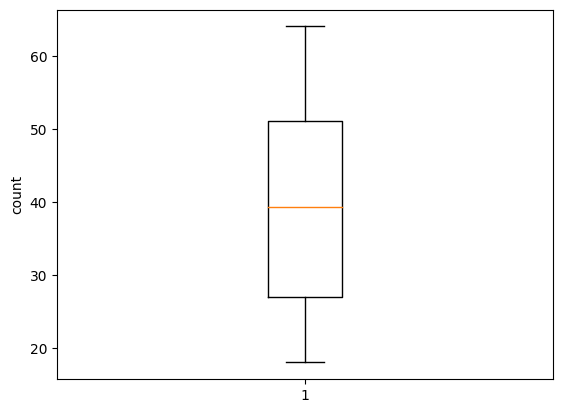

bmi


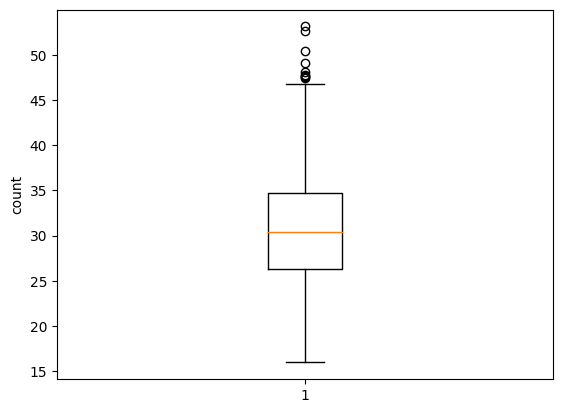

children


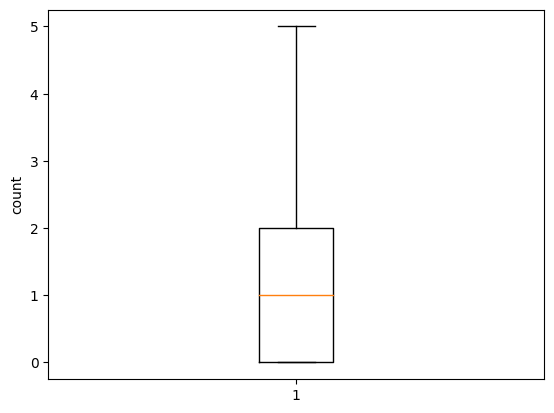

Claim_Amount


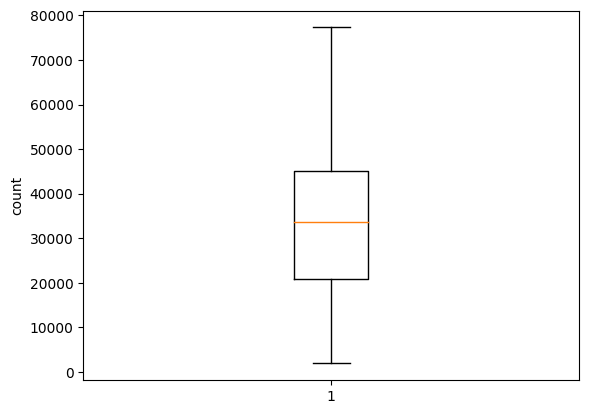

past_consultations


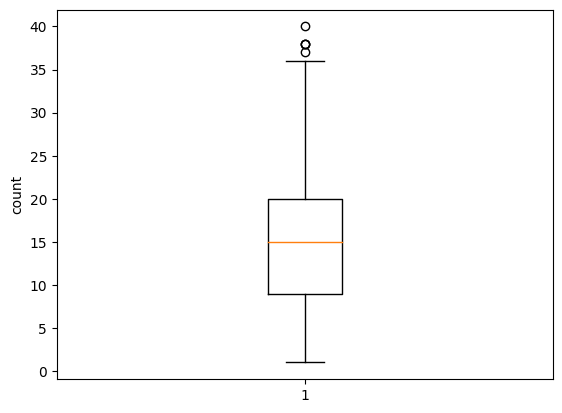

num_of_steps


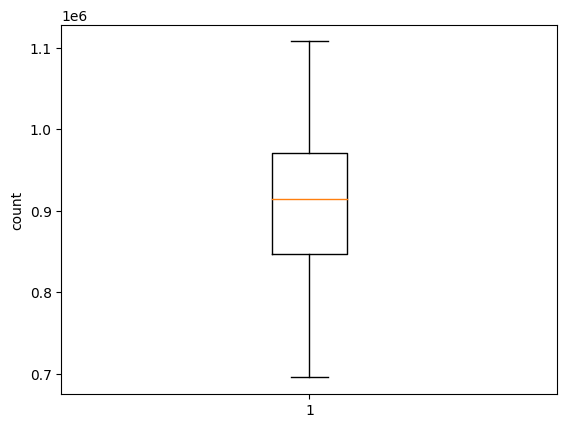

Hospital_expenditure


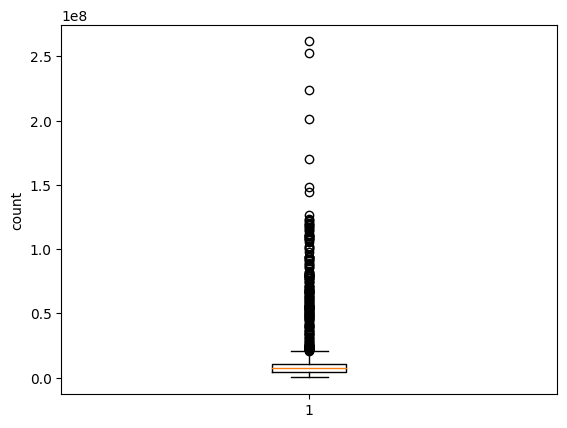

NUmber_of_past_hospitalizations


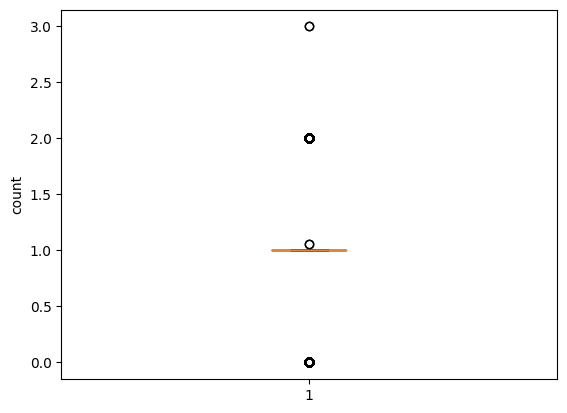

Anual_Salary


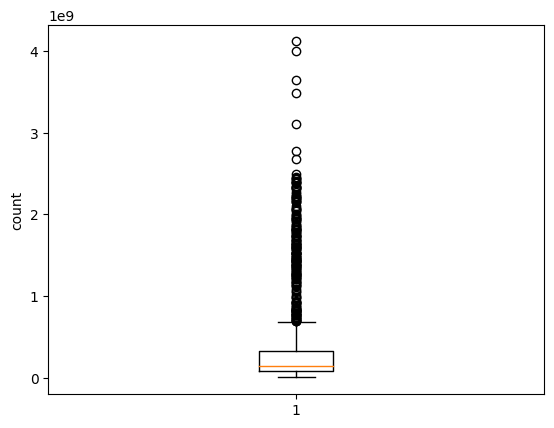

charges


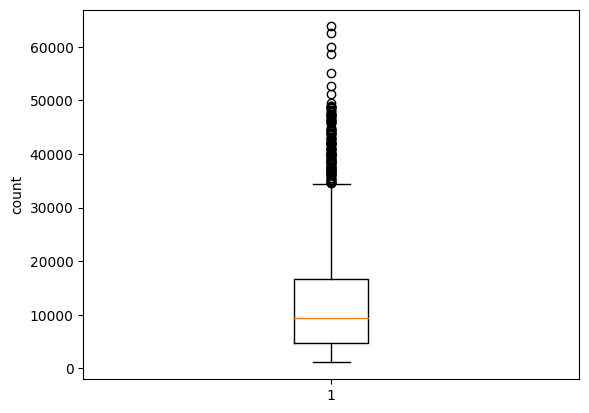

In [18]:
for i in df.select_dtypes(include='float64').columns:
    plt.boxplot(df[i])
    print(i)
    plt.ylabel("count")
    plt.show()

Index(['Anual_Salary', 'Claim_Amount', 'Hospital_expenditure',
       'NUmber_of_past_hospitalizations', 'age', 'bmi', 'charges', 'children',
       'num_of_steps', 'past_consultations'],
      dtype='object')


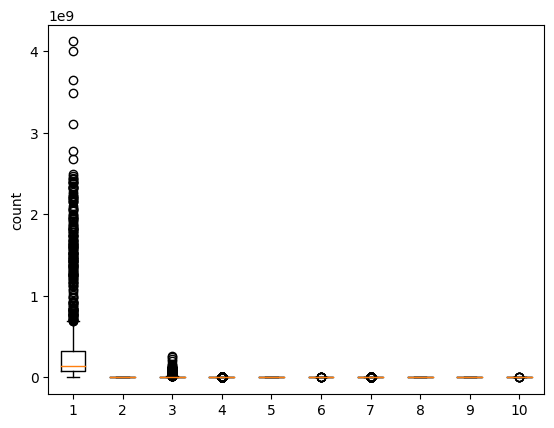

In [19]:
ddd = df.select_dtypes(include=['float64']).columns.difference(df['charges'])
print(ddd)
plt.boxplot(df[ddd])
plt.ylabel("count")
plt.show()

Index(['age', 'bmi', 'children', 'Claim_Amount', 'past_consultations',
       'num_of_steps', 'Hospital_expenditure',
       'NUmber_of_past_hospitalizations', 'Anual_Salary', 'charges'],
      dtype='object')


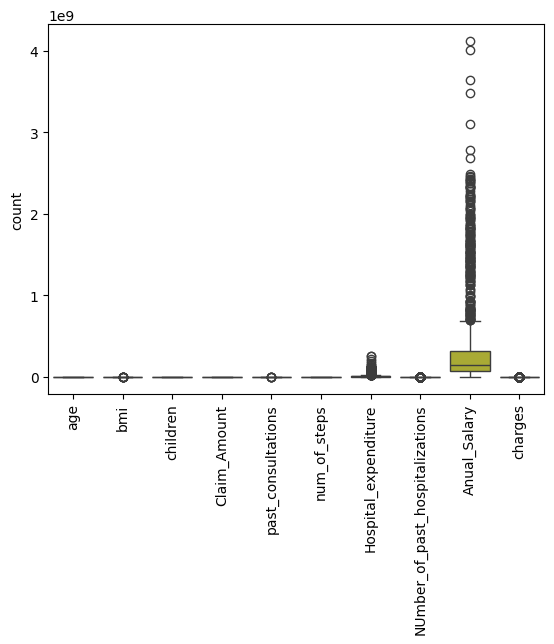

In [20]:
import seaborn as sns
ddd = df.select_dtypes(include=['float64']).columns
print(ddd)
sns.boxplot(df[ddd])
plt.xticks(rotation='vertical')
plt.ylabel("count")
plt.show()

In [21]:
outlier_list=['bmi','past_consultations','Hospital_expenditure','Anual_Salary']
for i in outlier_list:

    Q1=df[i].quantile(0.25)
    Q3=df[i].quantile(0.75)
    IQR=Q3-Q1

    df = df[(df[i]> Q1-1.5*IQR) & (df[i]< Q3+1.5*IQR)]

In [22]:
#earlier (1338, 13)
df.shape

(1030, 13)

In [23]:
df.duplicated().sum()

0

from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list = [] #to store only the numerical independent data
for i in insurance.columns:
    if ((insurance[i].dtype != "object") & (i!='charges')):
        col_list.append(i)    
X = insurance[col_list]
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif_data

In [24]:
df=df.drop(['NUmber_of_past_hospitalizations'],axis=1)

In [25]:
df=df.drop(['bmi'],axis=1)

In [26]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
var_inflation=[]
for i in df.columns:
    if((df[i].dtype!='object')&(i!='charges')):
        var_inflation.append(i)
x=df[var_inflation]
vif_data=pd.DataFrame()
vif_data['feature']=x.columns
vif_data['VIF']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_data


,feature,VIF
0,age,13.792519
1,children,1.833335
2,Claim_Amount,5.683286
3,past_consultations,6.249487
4,num_of_steps,26.121303
5,Hospital_expenditure,5.320052
6,Anual_Salary,5.325988


In [27]:
df=df.drop(['num_of_steps'],axis=1)

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
var_inflation=[]
for i in df.columns:
    if((df[i].dtype!='object')&(i!='charges')):
        var_inflation.append(i)
x=df[var_inflation]
vif_data=pd.DataFrame()
vif_data['feature']=x.columns
vif_data['VIF']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_data

,feature,VIF
0,age,8.489672
1,children,1.736466
2,Claim_Amount,4.666169
3,past_consultations,5.213493
4,Hospital_expenditure,4.581859
5,Anual_Salary,5.309970


In [29]:
df=df.drop(['age'],axis=1)

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
var_inflation=[]
for i in df.columns:
    if((df[i].dtype!='object')&(i!='charges')):
        var_inflation.append(i)
x=df[var_inflation]
vif_data=pd.DataFrame()
vif_data['feature']=x.columns
vif_data['VIF']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif_data

,feature,VIF
0,children,1.714400
1,Claim_Amount,4.169418
2,past_consultations,4.671708
3,Hospital_expenditure,4.391913
4,Anual_Salary,4.398658


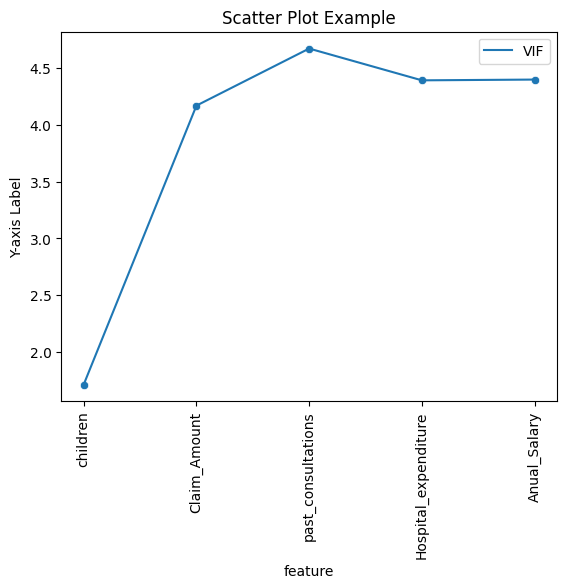

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming data is a pandas DataFrame containing x and y columns
# sns.scatterplot automatically extracts x and y from the DataFrame
sns.scatterplot(data=vif_data, x='feature', y='VIF')
sns.lineplot(data=vif_data)
# Add labels and title
plt.xticks(rotation=90)
plt.ylabel('Y-axis Label')
plt.title('Scatter Plot Example')

# Show plot
plt.show()

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [33]:
x

,children,Claim_Amount,past_consultations,Hospital_expenditure,Anual_Salary
0,0.0,29087.54313,17.0,4.720921e+06,5.578497e+07
1,0.0,39053.67437,7.0,4.329832e+06,1.370089e+07
2,0.0,39023.62759,19.0,6.884861e+06,7.352311e+07
3,0.0,28185.39332,11.0,4.274774e+06,7.581968e+07
4,0.0,14697.85941,16.0,3.787294e+06,2.301232e+07
...,...,...,...,...,...
1046,1.0,51168.25474,23.0,1.665982e+07,3.712188e+08
1048,3.0,46619.40230,27.0,1.361938e+07,3.812895e+08
1050,0.0,24382.58056,21.0,1.028991e+07,3.745310e+08
1062,2.0,21596.43846,10.0,1.083030e+07,1.419361e+08


In [34]:
y=df.iloc[:,-1]
y

0        1121.87390
1        1131.50660
2        1135.94070
3        1136.39940
4        1137.01100
           ...     
1046    19107.77960
1048    19199.94400
1050    19350.36890
1062    19798.05455
1069    20234.85475
Name: charges, Length: 1030, dtype: float64

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.80, random_state = 999)
x_train

,children,Claim_Amount,past_consultations,Hospital_expenditure,Anual_Salary
378,2.0,46073.654360,5.0,2.606962e+06,4.707590e+07
730,0.0,55821.532460,17.0,5.048570e+06,1.725900e+08
66,0.0,17975.327670,14.0,4.993491e+05,5.445941e+07
391,0.0,31971.078820,16.0,9.642962e+06,4.098743e+07
845,3.0,52155.958830,11.0,7.683186e+06,1.969077e+08
...,...,...,...,...,...
477,2.0,30943.342060,17.0,2.941387e+06,6.400286e+07
227,1.0,16091.000090,11.0,3.454417e+06,7.257541e+07
483,2.0,18512.993280,16.0,7.442466e+05,1.368503e+08
875,0.0,41844.564980,8.0,1.191697e+07,1.629471e+08


In [36]:
x_test

,children,Claim_Amount,past_consultations,Hospital_expenditure,Anual_Salary
688,0.0,55041.11308,16.0,9347759.462,1.776668e+08
118,0.0,41088.03452,5.0,9130424.338,8.280646e+07
162,0.0,40556.76177,4.0,8480882.157,9.511170e+07
319,4.0,49387.26568,21.0,6722423.975,3.013997e+07
95,0.0,46294.14244,12.0,8618011.074,4.945314e+07
...,...,...,...,...,...
710,1.0,16041.60718,11.0,2058404.704,1.081633e+08
303,2.0,50874.98966,11.0,1295881.058,3.472714e+07
292,2.0,15024.52722,3.0,9950954.420,1.925496e+07
384,2.0,29946.32144,15.0,4697699.977,5.466699e+07


In [37]:
l_model=LinearRegression()
l_model.fit(x_train,y_train)

LinearRegression()

In [38]:
predictions = l_model.predict(x_test)

In [39]:
predictions

array([10471.25366233,  5529.11641942,  6048.35213521,  4425.99288888,
        4118.8608649 ,  7154.72616597,  4648.07601626,  6222.23679043,
        3303.81369785,  7093.51748123,  4133.18968096,  5029.83661263,
        5313.11528516,  5704.04971904, 17078.46509779,  5435.55726456,
        8503.2403966 ,  8501.28232022,  9260.49724431, 12948.5598832 ,
        7294.69367534,  8150.12881153,  4813.81049389,  3519.73342869,
        9416.80750606,  3345.9303182 ,  4401.60930291,  4878.02158984,
        3989.87672789,  3486.00012413,  4990.38933128,  4165.68838326,
        7555.35403259,  2168.56642128, 14409.90355062, 13197.08202657,
       17589.27499616, 16807.7742726 , 10032.62391669,  7025.39336094,
        4897.52432216,  5966.24684499,  5652.36614818,  6765.28035804,
        7459.8774265 ,  5040.15795554,  5285.67826971, 19306.1853482 ,
        5778.08364604, 13137.04266398,  2203.79314231,  7088.18046215,
        6247.74907682,  4175.13089165,  9734.88884562,  6023.34477828,
      

In [40]:
from sklearn.metrics import *
r2score=r2_score(y_test,predictions)
r2score

0.8434587218026761

In [41]:
x_test

,children,Claim_Amount,past_consultations,Hospital_expenditure,Anual_Salary
688,0.0,55041.11308,16.0,9347759.462,1.776668e+08
118,0.0,41088.03452,5.0,9130424.338,8.280646e+07
162,0.0,40556.76177,4.0,8480882.157,9.511170e+07
319,4.0,49387.26568,21.0,6722423.975,3.013997e+07
95,0.0,46294.14244,12.0,8618011.074,4.945314e+07
...,...,...,...,...,...
710,1.0,16041.60718,11.0,2058404.704,1.081633e+08
303,2.0,50874.98966,11.0,1295881.058,3.472714e+07
292,2.0,15024.52722,3.0,9950954.420,1.925496e+07
384,2.0,29946.32144,15.0,4697699.977,5.466699e+07


In [42]:
a=l_model.predict([[3,47488, 18, 378499, 3883929]])
a

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2421.08567529])

import matplotlib.pyplot as plt

plt.style.use('default')
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(7, 3.5))

ax.plot(x_pred, y_pred, color='k', label='Regression model')
ax.scatter(X, y, edgecolor='k', facecolor='grey', alpha=0.7, label='Sample data')
ax.set_ylabel('Gas production (Mcf/day)', fontsize=14)
ax.set_xlabel('Porosity (%)', fontsize=14)
ax.legend(facecolor='white', fontsize=11)
ax.text(0.55, 0.15, '$y = %.2f x_1 - %.2f $' % (model.coef_[0], abs(model.intercept_)), fontsize=17, transform=ax.transAxes)

fig.tight_layout()

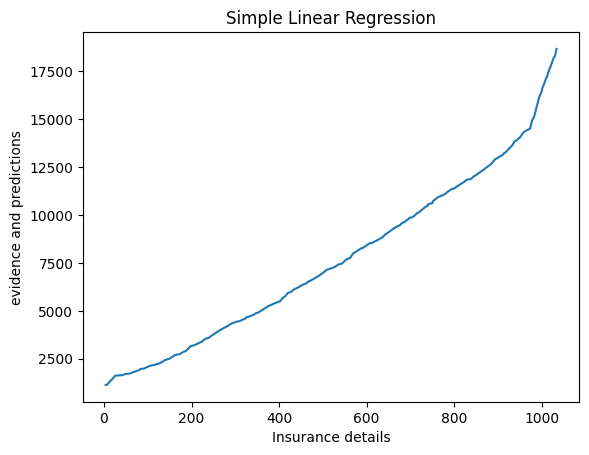

In [43]:
import matplotlib.pyplot as plt
sns.lineplot(data=y_test)
#sns.scatterplot(data=color='green')
plt.title('Simple Linear Regression')
plt.xlabel('Insurance details')
plt.ylabel('evidence and predictions')
plt.show()

In [44]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error:", mse)


Mean Squared Error: 3150553.810759192


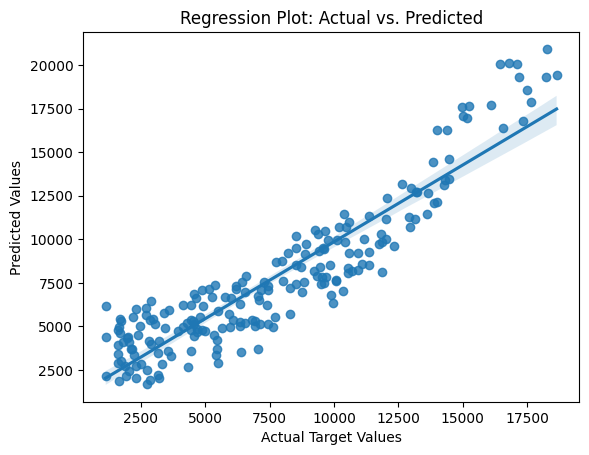

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a regression plot
sns.regplot(x=y_test, y=predictions)

# Set plot labels and title
plt.xlabel("Actual Target Values")
plt.ylabel("Predicted Values")
plt.title("Regression Plot: Actual vs. Predicted")

# Display the plot
plt.show()
